In [30]:
#Bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

###### Projeto para prever vendas em determinado período
###### TV, Jornal e Rádio estão em milhares de reais
###### Vendas estão em milhões
###### Os dados já estão tratados

#### Carregando os dados e realizando análise exploratória

In [7]:
# Carregando os dados
tabela = pd.read_csv("advertising.csv")
tabela.head(10)
#tabela.info()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


#### Analisando a correlação dos dados

In [10]:
display(tabela.corr()) 

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


###### Observamos que a melhor correlação é a de TV (valor próximo a 1)
###### A correlação está baixa em jornal (valor próximo a zero)

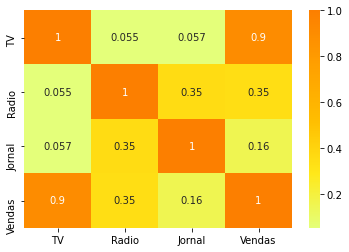

In [14]:
sns.heatmap(tabela.corr(), cmap= "Wistia", annot= True)
plt.show()

#### Iniciando o modelo de ML para fazer a previsão de vendas

In [15]:
# dividindo os dados em treino e teste
X = tabela.drop("Vendas", axis = 1)
y = tabela["Vendas"]

In [33]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size = 0.2)

#### Implementando os Modelos de IA para esse conjunto de dados

In [34]:
regressao_linear = LinearRegression()
arvore_decisao = RandomForestRegressor()

regressao_linear.fit(X_treino, y_treino)
arvore_decisao.fit(X_treino, y_treino)

RandomForestRegressor()

#### Previsão 

In [35]:
# Previsão do modelo de Regressão Linear
previsao_regressaolinear = regressao_linear.predict(X_teste)
previsao_arvoredecisao = arvore_decisao.predict(X_teste)
print(r2_score(y_teste, previsao_regressaolinear))  # quão próximo o modelo se aproxima do resultado
print(r2_score(y_teste, previsao_arvoredecisao)) 

0.9353485340701463
0.9709912240527611


#### Observamos que o modelo de árvore de decisão apresentou maior acurácia

###### Visualizando os resultados

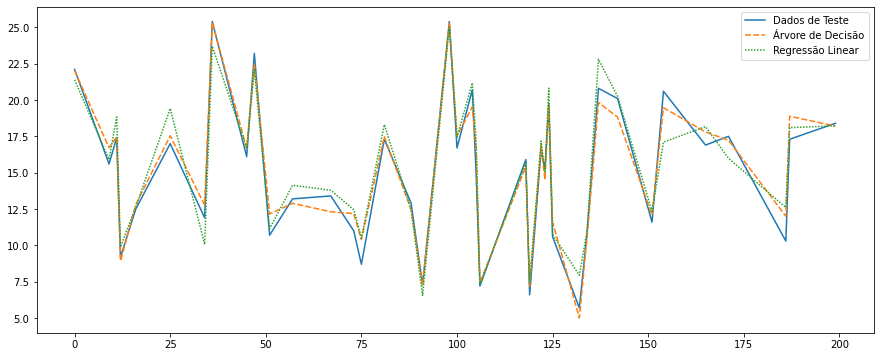

In [47]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["Dados de Teste"] = y_teste
tabela_auxiliar["Árvore de Decisão"] = previsao_arvoredecisao
tabela_auxiliar["Regressão Linear"] = previsao_regressaolinear
plt.figure(figsize=(15,6))
sns.lineplot(data = tabela_auxiliar)
plt.show()

##### Fazendo uma previsão 
 - Neste caso, criamos uma tabela e passamos novos valores para prever as vendas
 - Será exibido os resuldados aplicados ao modelo de Árvore de Decisão

In [44]:
novos = pd.read_csv("novos.csv") 
novos.head()

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [45]:
print(arvore_decisao.predict(novos))

[ 7.492  8.567 19.983]


In [46]:
print(regressao_linear.predict(novos))

[ 6.65506717  7.13261807 18.64275896]
